In [1]:
import anndata as ad
import numpy as np
import matplotlib.pyplot as plt
import h5py
import pandas as pd
import os

import phate
import scanpy as sc


In [2]:
# Meta data
DATA_DIR = "../../data/multi_cite/"
FP_CELL_METADATA = os.path.join(DATA_DIR,"metadata.csv")
FP_TRAIN_CITE_INPUTS = os.path.join(DATA_DIR,"train_cite_inputs.h5")
FP_TEST_CITE_INPUTS = os.path.join(DATA_DIR,"test_cite_inputs.h5")

df_meta = pd.read_csv(FP_CELL_METADATA)
df_meta

cell_id  day  donor cell_type technology
0       c2150f55becb    2  27678       HSC    citeseq
1       65b7edf8a4da    2  27678       HSC    citeseq
2       c1b26cb1057b    2  27678      EryP    citeseq
3       917168fa6f83    2  27678      NeuP    citeseq
4       2b29feeca86d    2  27678      EryP    citeseq
...              ...  ...    ...       ...        ...
281523  96a60b026659   10  31800    hidden   multiome
281524  d493e546991e   10  31800    hidden   multiome
281525  05666c99aa48   10  31800    hidden   multiome
281526  121f946642b5   10  31800    hidden   multiome
281527  b847ba21f59f   10  31800    hidden   multiome

[281528 rows x 5 columns]

In [3]:
df_train = pd.read_hdf(FP_TRAIN_CITE_INPUTS)
df_train

gene_id       ENSG00000121410_A1BG  ENSG00000268895_A1BG-AS1   
cell_id                                                        
45006fe3e4c8                   0.0                       0.0  \
d02759a80ba2                   0.0                       0.0   
c016c6b0efa5                   0.0                       0.0   
ba7f733a4f75                   0.0                       0.0   
fbcf2443ffb2                   0.0                       0.0   
...                            ...                       ...   
650ee456f0f3                   0.0                       0.0   
cc506e7707f5                   0.0                       0.0   
a91f1b55a520                   0.0                       0.0   
3a9882c98205                   0.0                       0.0   
c91b6b2ccd3d                   0.0                       0.0   

gene_id       ENSG00000175899_A2M  ENSG00000245105_A2M-AS1   
cell_id                                                      
45006fe3e4c8                  0.0                      0.0  \
d02759a80ba2                  0.0                      0.0   
c016c6b0efa5                  0.0                      0.0   
ba7f733a4f75                  0.0                      0.0   
fbcf2443ffb2                  0.0                      0.0   
...                           ...                      ...   
650ee456f0f3                  0.0                      0.0   
cc506e7707f5                  0.0                      0.0   
a91f1b55a520                  0.0                      0.0   
3a9882c98205                  0.0                      0.0   
c91b6b2ccd3d                  0.0                      0.0   

gene_id       ENSG00000166535_A2ML1  ENSG00000128274_A4GALT   
cell_id                                                       
45006fe3e4c8                    0.0                0.000000  \
d02759a80ba2                    0.0                0.000000   
c016c6b0efa5                    0.0                3.847321   
ba7f733a4f75                    0.0                0.000000   
fbcf2443ffb2                    0.0                0.000000   
...                             ...                     ...   
650ee456f0f3                    0.0                0.000000   
cc506e7707f5                    0.0                0.000000   
a91f1b55a520                    0.0                0.000000   
3a9882c98205                    0.0                0.000000   
c91b6b2ccd3d                    0.0                0.000000   

gene_id       ENSG00000094914_AAAS  ENSG00000081760_AACS   
cell_id                                                    
45006fe3e4c8              0.000000              0.000000  \
d02759a80ba2              0.000000              0.000000   
c016c6b0efa5              0.000000              3.847321   
ba7f733a4f75              3.436846              3.436846   
fbcf2443ffb2              0.000000              4.196826   
...                            ...                   ...   
650ee456f0f3              0.000000              0.000000   
cc506e7707f5              3.981467              4.665241   
a91f1b55a520              0.000000              4.497696   
3a9882c98205              3.900907              0.000000   
c91b6b2ccd3d              0.000000              0.000000   

gene_id       ENSG00000109576_AADAT  ENSG00000103591_AAGAB  ...   
cell_id                                                     ...   
45006fe3e4c8               0.000000               0.000000  ...  \
d02759a80ba2               0.000000               0.000000  ...   
c016c6b0efa5               3.847321               0.000000  ...   
ba7f733a4f75               0.000000               0.000000  ...   
fbcf2443ffb2               0.000000               0.000000  ...   
...                             ...                    ...  ...   
650ee456f0f3               0.000000               0.000000  ...   
cc506e7707f5               0.000000               0.000000  ...   
a91f1b55a520               0.000000               4.497696  ...   
3a9882c98205          

In [4]:
df_test = pd.read_hdf(FP_TEST_CITE_INPUTS)
df_test


gene_id       ENSG00000121410_A1BG  ENSG00000268895_A1BG-AS1   
cell_id                                                        
c2150f55becb                   0.0                       0.0  \
65b7edf8a4da                   0.0                       0.0   
c1b26cb1057b                   0.0                       0.0   
917168fa6f83                   0.0                       0.0   
2b29feeca86d                   0.0                       0.0   
...                            ...                       ...   
a9b4d99f1f50                   0.0                       0.0   
0e2c1d0782af                   0.0                       0.0   
a3cbc5aa0ec3                   0.0                       0.0   
75b350243add                   0.0                       0.0   
ad5a949989b2                   0.0                       0.0   

gene_id       ENSG00000175899_A2M  ENSG00000245105_A2M-AS1   
cell_id                                                      
c2150f55becb                  0.0                      0.0  \
65b7edf8a4da                  0.0                      0.0   
c1b26cb1057b                  0.0                      0.0   
917168fa6f83                  0.0                      0.0   
2b29feeca86d                  0.0                      0.0   
...                           ...                      ...   
a9b4d99f1f50                  0.0                      0.0   
0e2c1d0782af                  0.0                      0.0   
a3cbc5aa0ec3                  0.0                      0.0   
75b350243add                  0.0                      0.0   
ad5a949989b2                  0.0                      0.0   

gene_id       ENSG00000166535_A2ML1  ENSG00000128274_A4GALT   
cell_id                                                       
c2150f55becb                    0.0                0.000000  \
65b7edf8a4da                    0.0                0.000000   
c1b26cb1057b                    0.0                3.847321   
917168fa6f83                    0.0                0.000000   
2b29feeca86d                    0.0                0.000000   
...                             ...                     ...   
a9b4d99f1f50                    0.0                0.000000   
0e2c1d0782af                    0.0                0.000000   
a3cbc5aa0ec3                    0.0                0.000000   
75b350243add                    0.0                0.000000   
ad5a949989b2                    0.0                0.000000   

gene_id       ENSG00000094914_AAAS  ENSG00000081760_AACS   
cell_id                                                    
c2150f55becb              0.000000              0.000000  \
65b7edf8a4da              0.000000              0.000000   
c1b26cb1057b              0.000000              3.847321   
917168fa6f83              3.436846              3.436846   
2b29feeca86d              0.000000              4.196826   
...                            ...                   ...   
a9b4d99f1f50              0.000000              0.000000   
0e2c1d0782af              0.000000              0.000000   
a3cbc5aa0ec3              0.000000              0.000000   
75b350243add              3.624848              3.624848   
ad5a949989b2              0.000000              4.452700   

gene_id       ENSG00000109576_AADAT  ENSG00000103591_AAGAB  ...   
cell_id                                                     ...   
c2150f55becb               0.000000               0.000000  ...  \
65b7edf8a4da               0.000000               0.000000  ...   
c1b26cb1057b               3.847321               0.000000  ...   
917168fa6f83               0.000000               0.000000  ...   
2b29feeca86d               0.000000               0.000000  ...   
...                             ...                    ...  ...   
a9b4d99f1f50               0.000000               3.719836  ...   
0e2c1d0782af               4.026206               0.000000  ...   
a3cbc5aa0ec3               0.000000               0.000000  ...   
75b350243add          

In [5]:
# Only focus on donor 13176
donor = 13176
days_to_keep = [2,3,4,7]
df_donor_meta = df_meta[(df_meta['donor']==donor) & (df_meta['technology']=="citeseq") & (df_meta['cell_type']!="unknown") & df_meta['day'].isin(days_to_keep)]
print(df_donor_meta.shape)


(29394, 5)


In [6]:
donor_cell_ids = df_donor_meta['cell_id'].unique().tolist()
print(len(donor_cell_ids))

unique_days = df_donor_meta['day'].unique().tolist()
print(unique_days)

unique_cell_types = df_donor_meta['cell_type'].unique().tolist()
print(unique_cell_types)


29394
[2, 3, 4, 7]
['NeuP', 'EryP', 'HSC', 'MasP', 'MkP', 'MoP', 'BP']


In [7]:
# Filter df_train, df_test on donor_cell_ids
df_train_donor = df_train[df_train.index.isin(donor_cell_ids)]
df_test_donor = df_test[df_test.index.isin(donor_cell_ids)]

print(df_train_donor.shape)
print(df_test_donor.shape)

(22199, 22050)
(7195, 22050)


In [8]:
df_all = pd.concat([df_train_donor, df_test_donor])

In [9]:
df_all

gene_id       ENSG00000121410_A1BG  ENSG00000268895_A1BG-AS1   
cell_id                                                        
08a6f9047e1f                   0.0                       0.0  \
dc33db8b968f                   0.0                       0.0   
bb17cbbb7869                   0.0                       0.0   
608afab25c95                   0.0                       0.0   
f0a5edc0a949                   0.0                       0.0   
...                            ...                       ...   
df9aa1771f5e                   0.0                       0.0   
2de915de2730                   0.0                       0.0   
71c79a403e17                   0.0                       0.0   
7e0a56ea890d                   0.0                       0.0   
e7f7a547d511                   0.0                       0.0   

gene_id       ENSG00000175899_A2M  ENSG00000245105_A2M-AS1   
cell_id                                                      
08a6f9047e1f                  0.0                      0.0  \
dc33db8b968f                  0.0                      0.0   
bb17cbbb7869                  0.0                      0.0   
608afab25c95                  0.0                      0.0   
f0a5edc0a949                  0.0                      0.0   
...                           ...                      ...   
df9aa1771f5e                  0.0                      0.0   
2de915de2730                  0.0                      0.0   
71c79a403e17                  0.0                      0.0   
7e0a56ea890d                  0.0                      0.0   
e7f7a547d511                  0.0                      0.0   

gene_id       ENSG00000166535_A2ML1  ENSG00000128274_A4GALT   
cell_id                                                       
08a6f9047e1f                    0.0                     0.0  \
dc33db8b968f                    0.0                     0.0   
bb17cbbb7869                    0.0                     0.0   
608afab25c95                    0.0                     0.0   
f0a5edc0a949                    0.0                     0.0   
...                             ...                     ...   
df9aa1771f5e                    0.0                     0.0   
2de915de2730                    0.0                     0.0   
71c79a403e17                    0.0                     0.0   
7e0a56ea890d                    0.0                     0.0   
e7f7a547d511                    0.0                     0.0   

gene_id       ENSG00000094914_AAAS  ENSG00000081760_AACS   
cell_id                                                    
08a6f9047e1f              3.451580              0.000000  \
dc33db8b968f              4.264111              0.000000   
bb17cbbb7869              0.000000              0.000000   
608afab25c95              0.000000              4.199862   
f0a5edc0a949              0.000000              0.000000   
...                            ...                   ...   
df9aa1771f5e              0.000000              0.000000   
2de915de2730              0.000000              0.000000   
71c79a403e17              4.267572              0.000000   
7e0a56ea890d              0.000000              0.000000   
e7f7a547d511              4.120462              0.000000   

gene_id       ENSG00000109576_AADAT  ENSG00000103591_AAGAB  ...   
cell_id                                                     ...   
08a6f9047e1f               0.000000               0.000000  ...  \
dc33db8b968f               0.000000               0.000000  ...   
bb17cbbb7869               3.884389               0.000000  ...   
608afab25c95               0.000000               0.000000  ...   
f0a5edc0a949               0.000000               0.000000  ...   
...                             ...                    ...  ...   
df9aa1771f5e               0.000000               0.000000  ...   
2de915de2730               0.000000               0.000000  ...   
71c79a403e17               0.000000               4.267572  ...   
7e0a56ea890d          

### Visualize the df_train_donor

In [12]:
adata = ad.AnnData(df_all)
adata.var_names = df_all.columns
adata.obs_names = df_all.index
adata.obs['donor'] = donor
adata.obs['technology'] = 'citeseq'
adata.obs['cell_id'] = df_all.index
# adata.var['feature_name'] = df_all.columns
adata
# adata = ad.AnnData(df_train_donor)
# adata.var_names = df_train_donor.columns
# adata.obs_names = df_train_donor.index
# adata.obs['donor'] = donor
# adata.obs['technology'] = 'citeseq'
# adata.obs['cell_id'] = df_train_donor.index
# adata.var['feature_name'] = df_train_donor.columns
# adata


AnnData object with n_obs × n_vars = 29394 × 22050
    obs: 'donor', 'technology', 'cell_id'

In [13]:
# pair day with cell id
cellid2day = {cell_id: day for cell_id, day in zip(df_donor_meta['cell_id'], df_donor_meta['day'])}
adata.obs['day'] = [cellid2day[cell_id] for cell_id in adata.obs['cell_id']]

print(adata)


AnnData object with n_obs × n_vars = 29394 × 22050
    obs: 'donor', 'technology', 'cell_id', 'day'


In [14]:
day_class = np.unique(adata.obs['day'].tolist())
print(day_class)

day2class = {day: i for i, day in enumerate(day_class)}
adata.obs['day_class'] = [day2class[day] for day in adata.obs['day']]
print(adata)

[2 3 4 7]
AnnData object with n_obs × n_vars = 29394 × 22050
    obs: 'donor', 'technology', 'cell_id', 'day', 'day_class'


In [15]:
adata.obs['day_class'].unique()

array([0, 1, 2, 3])

In [110]:
# save adata
# adata.write("adata_cite_all_donor-13176.h5ad")

In [5]:
# # load adata
# adata = ad.read_h5ad("adata_cite_all_donor-13176.h5ad")
# adata

AnnData object with n_obs × n_vars = 29394 × 22050
    obs: 'donor', 'technology', 'cell_id', 'day', 'day_class'
    var: 'feature_name'

In [16]:
# hvg
sc.pp.highly_variable_genes(adata, n_top_genes=1000)
adata

AnnData object with n_obs × n_vars = 29394 × 22050
    obs: 'donor', 'technology', 'cell_id', 'day', 'day_class'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'hvg'

In [9]:
# # pca, 50 components
# sc.tl.pca(adata, n_comps=100)
# adata

AnnData object with n_obs × n_vars = 29394 × 22050
    obs: 'donor', 'technology', 'cell_id', 'day', 'day_class'
    var: 'feature_name', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'hvg', 'pca'
    obsm: 'X_pca'
    varm: 'PCs'

In [20]:
adata.X[:,adata.var['highly_variable']].shape

(29394, 1000)

In [21]:
from scipy.spatial.distance import pdist, squareform
from scipy import sparse as sp

def convert_data(X, colors, seed=42, test_size=0.1, knn=5, t='auto', n_components=3):
    # if X is sparse, convert to dense
    if sp.issparse(X):
        X = X.toarray()
        
    phate_op = phate.PHATE(random_state=seed, t=t, n_components=n_components, knn=knn)
    phate_data = phate_op.fit_transform(X)

    dists = squareform(pdist(phate_op.diff_potential))

    return dict(
        data=X,
        colors=colors,
        dist=dists,
        phate=phate_data
    )

# data = convert_data(adata.obsm['X_pca'][:,:100], np.array(adata.obs['day_class'].tolist()))
data = convert_data(adata.X[:,adata.var['highly_variable']], np.array(adata.obs['day_class'].tolist()))

Calculating PHATE...
  Running PHATE on 29394 observations and 1000 variables.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 1.17 seconds.
    Calculating KNN search...
    Calculated KNN search in 50.16 seconds.
    Calculating affinities...
    Calculated affinities in 13.05 seconds.
  Calculated graph and diffusion operator in 64.41 seconds.
  Calculating landmark operator...
    Calculating SVD...
    Calculated SVD in 1.67 seconds.
    Calculating KMeans...
    Calculated KMeans in 2.06 seconds.
  Calculated landmark operator in 4.25 seconds.
  Calculating optimal t...
    Automatically selected t = 17
  Calculated optimal t in 2.49 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 0.46 seconds.
  Calculating metric MDS...


/opt/miniconda3/envs/yale529/lib/python3.9/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


  Calculated metric MDS in 8.29 seconds.
Calculated PHATE in 79.91 seconds.


In [22]:
print(data['data'].shape)
print(data['colors'].shape)
print(data['dist'].shape)
print(data['phate'].shape)

# save npz
# np.savez("../../data/cite_all_D-50_d-3_pca.npz", data=data['data'], colors=data['colors'], dist=data['dist'], phate=data['phate'])
# np.savez("../../data/cite_all_D-100_d-3_pca.npz", data=data['data'], colors=data['colors'], dist=data['dist'], phate=data['phate'])
np.savez("../../data/cite_all_D-1000_d-3_hvg.npz", data=data['data'], colors=data['colors'], dist=data['dist'], phate=data['phate'])


(29394, 1000)
(29394,)
(29394, 29394)
(29394, 3)


In [14]:
import plotly.graph_objects as go
fig = go.Figure()
for i in range(adata.obs['day_class'].nunique()):
    fig.add_scatter3d(x=data['phate'][adata.obs['day_class']==i,0], 
                      y=data['phate'][adata.obs['day_class']==i,1], 
                      z=data['phate'][adata.obs['day_class']==i,2], 
                      mode='markers', marker=dict(size=2, color=i))
fig.show()


: 

### Visualization

Calculating PHATE...
  Running PHATE on 22199 observations and 50 variables.
  Calculating graph and diffusion operator...
    Calculating KNN search...
    Calculated KNN search in 9.23 seconds.
    Calculating affinities...
    Calculated affinities in 0.11 seconds.
  Calculated graph and diffusion operator in 9.35 seconds.
  Calculating landmark operator...
    Calculating SVD...
    Calculated SVD in 0.81 seconds.
    Calculating KMeans...
    Calculated KMeans in 3.48 seconds.
  Calculated landmark operator in 4.72 seconds.
  Calculating optimal t...
    Automatically selected t = 21
  Calculated optimal t in 2.26 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 0.53 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 1.92 seconds.
Calculated PHATE in 18.81 seconds.


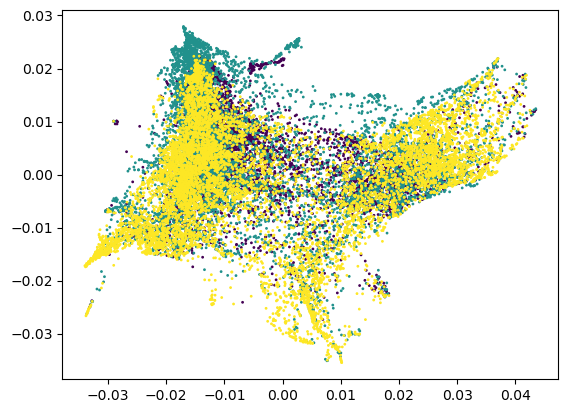

In [62]:
# phate on 50 pca components
phate_op = phate.PHATE(n_components=2)
df_train_donor_phate_50pca = phate_op.fit_transform(adata.obsm['X_pca'][:,:50])
df_train_donor_phate_50pca

plt.scatter(df_train_donor_phate_50pca[:,0], df_train_donor_phate_50pca[:,1], s=1, c=adata.obs['day_class'].tolist())

Calculating PHATE...
  Running PHATE on 22199 observations and 50 variables.
  Calculating graph and diffusion operator...
    Calculating KNN search...
    Calculated KNN search in 9.57 seconds.
    Calculating affinities...
    Calculated affinities in 0.12 seconds.
  Calculated graph and diffusion operator in 9.71 seconds.
  Calculating landmark operator...
    Calculating SVD...
    Calculated SVD in 0.98 seconds.
    Calculating KMeans...
    Calculated KMeans in 3.13 seconds.
  Calculated landmark operator in 4.55 seconds.
  Calculating optimal t...
    Automatically selected t = 21
  Calculated optimal t in 2.28 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 0.55 seconds.
  Calculating metric MDS...


/opt/miniconda3/envs/yale529/lib/python3.9/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


  Calculated metric MDS in 12.02 seconds.
Calculated PHATE in 29.12 seconds.


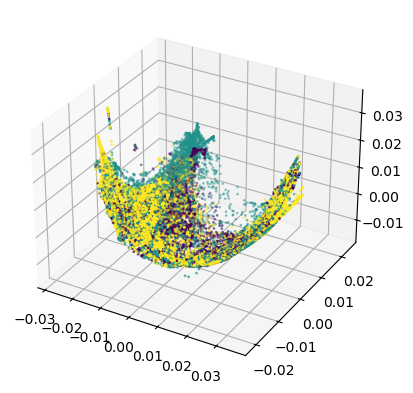

In [63]:
# phate on 50 pca
phate_op = phate.PHATE(n_components=3)
df_train_donor_phate_50pca_3d = phate_op.fit_transform(adata.obsm['X_pca'][:,:50])
df_train_donor_phate_50pca_3d

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_train_donor_phate_50pca_3d[:,0], df_train_donor_phate_50pca_3d[:,1], df_train_donor_phate_50pca_3d[:,2], s=1, c=adata.obs['day_class'].tolist())
plt.show()

In [66]:
df_train_donor_phate_50pca_3d

array([[-0.01208283,  0.0012407 , -0.00665182],
       [ 0.01888131,  0.00178948, -0.00473565],
       [-0.01698387,  0.00543864,  0.00081579],
       ...,
       [-0.00744836,  0.00550402, -0.00424436],
       [-0.01558391,  0.01265588,  0.00167762],
       [-0.01668356, -0.00709075,  0.00242827]])

In [65]:
# Plotly
import plotly.graph_objects as go

fig = go.Figure()
for i in range(adata.obs['day_class'].nunique()):
    fig.add_scatter3d(x=df_train_donor_phate_50pca_3d[adata.obs['day_class']==i,0], 
                      y=df_train_donor_phate_50pca_3d[adata.obs['day_class']==i,1], 
                      z=df_train_donor_phate_50pca_3d[adata.obs['day_class']==i,2], 
                      mode='markers', marker=dict(size=2, color=i))
fig.show()


Calculating PHATE...
  Running PHATE on 22199 observations and 1000 variables.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.98 seconds.
    Calculating KNN search...
    Calculated KNN search in 24.89 seconds.
    Calculating affinities...
    Calculated affinities in 6.84 seconds.
  Calculated graph and diffusion operator in 32.72 seconds.
  Calculating landmark operator...
    Calculating SVD...
    Calculated SVD in 1.07 seconds.
    Calculating KMeans...
    Calculated KMeans in 1.52 seconds.
  Calculated landmark operator in 3.02 seconds.
  Calculating optimal t...
    Automatically selected t = 20
  Calculated optimal t in 2.45 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 0.50 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 1.83 seconds.
Calculated PHATE in 40.53 seconds.


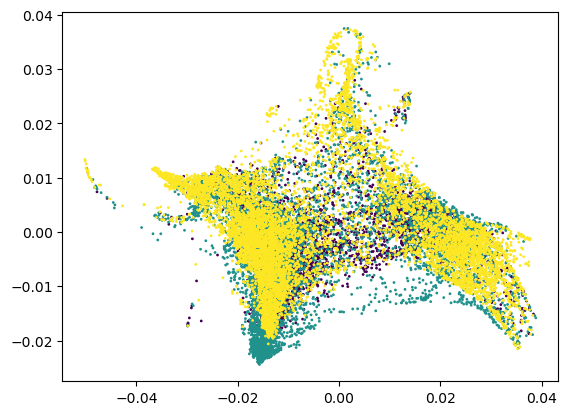

In [60]:
# phate on 1000 hvg
phate_op = phate.PHATE(n_components=2)
df_train_donor_phate_1000hvg = phate_op.fit_transform(adata.X[:,adata.var['highly_variable']])

plt.scatter(df_train_donor_phate_1000hvg[:,0], df_train_donor_phate_1000hvg[:,1], s=1, c=adata.obs['day_class'].tolist())
plt.show()


Calculating PHATE...
  Running PHATE on 22199 observations and 22050 variables.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 10.58 seconds.
    Calculating KNN search...
    Calculated KNN search in 19.51 seconds.
    Calculating affinities...
    Calculated affinities in 0.30 seconds.
  Calculated graph and diffusion operator in 30.76 seconds.
  Calculating landmark operator...
    Calculating SVD...
    Calculated SVD in 0.80 seconds.
    Calculating KMeans...
    Calculated KMeans in 1.89 seconds.
  Calculated landmark operator in 3.08 seconds.
  Calculating optimal t...
    Automatically selected t = 25
  Calculated optimal t in 2.30 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 0.49 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 1.79 seconds.
Calculated PHATE in 38.42 seconds.


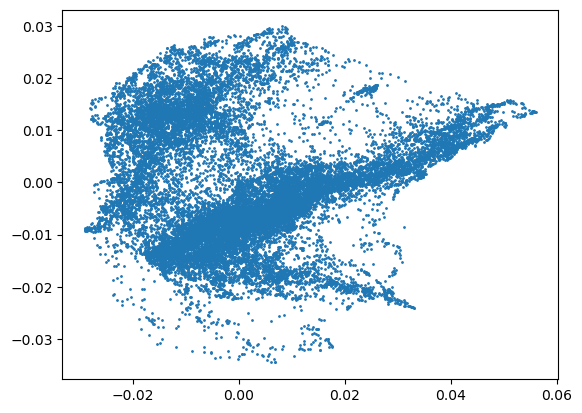

In [34]:
# Phate
phate_op = phate.PHATE(n_components=2)
df_train_donor_phate = phate_op.fit_transform(df_train_donor)
df_train_donor_phate


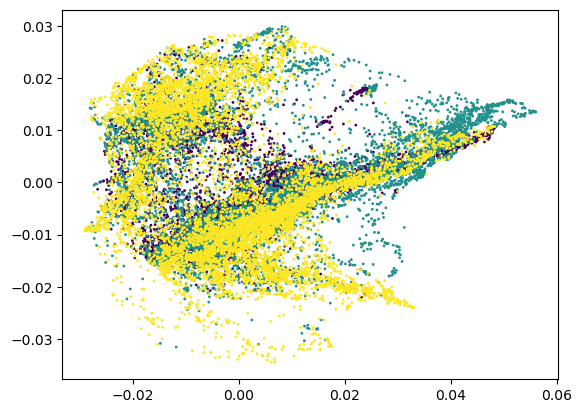

In [53]:
plt.scatter(df_train_donor_phate[:,0], df_train_donor_phate[:,1], s=1, c=adata.obs['day_class'].tolist())
plt.show()

Calculating PHATE...
  Running PHATE on 22199 observations and 22050 variables.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 11.02 seconds.
    Calculating KNN search...
    Calculated KNN search in 21.88 seconds.
    Calculating affinities...
    Calculated affinities in 0.30 seconds.
  Calculated graph and diffusion operator in 33.96 seconds.
  Calculating landmark operator...
    Calculating SVD...
    Calculated SVD in 0.82 seconds.
    Calculating KMeans...
    Calculated KMeans in 1.99 seconds.
  Calculated landmark operator in 3.24 seconds.
  Calculating optimal t...
    Automatically selected t = 25
  Calculated optimal t in 2.28 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 0.49 seconds.
  Calculating metric MDS...


/opt/miniconda3/envs/yale529/lib/python3.9/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


  Calculated metric MDS in 8.12 seconds.
Calculated PHATE in 48.11 seconds.


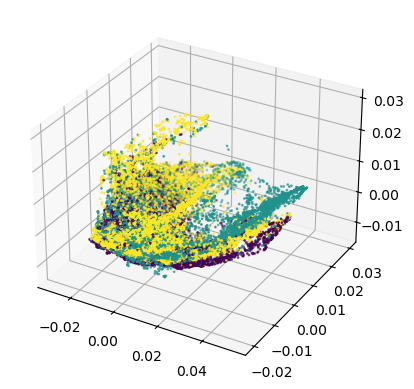

In [54]:
# phate 3d
phate_op = phate.PHATE(n_components=3)
df_train_donor_phate_3d = phate_op.fit_transform(df_train_donor)
df_train_donor_phate_3d

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


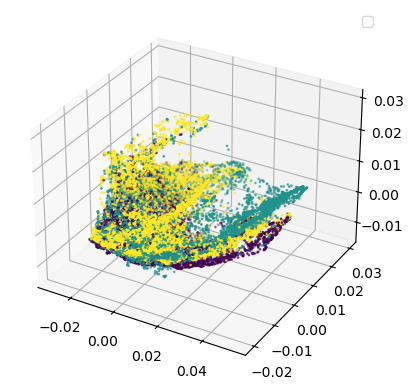

In [55]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_train_donor_phate_3d[:,0], df_train_donor_phate_3d[:,1], df_train_donor_phate_3d[:,2], s=1, c=adata.obs['day_class'].tolist())
plt.show()